In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
df=pd.read_excel('br-capes-colsucup-docente-2013a2016-2020-06-12_2016.xlsx')

df.head()

,AN_BASE,CD_AREA_AVALIACAO,NM_AREA_AVALIACAO,NM_GRANDE_AREA_CONHECIMENTO,NM_AREA_CONHECIMENTO,CD_PROGRAMA_IES,NM_PROGRAMA_IES,NM_GRAU_PROGRAMA,NM_MODALIDADE_PROGRAMA,CD_CONCEITO_PROGRAMA,...,AN_TITULACAO,NM_GRAU_TITULACAO,CD_AREA_BASICA_TITULACAO,NM_AREA_BASICA_TITULACAO,SG_IES_TITULACAO,NM_IES_TITULACAO,NM_PAIS_IES_TITULACAO,ID_ADD_FOTO_PROGRAMA,ID_ADD_FOTO_PROGRAMA_IES,DS_CLIENTELA_QUADRIENAL_2017
0,2016,9,CIÊNCIAS BIOLÓGICAS III,CIÊNCIAS BIOLÓGICAS,PARASITOLOGIA,10001018002P1,BIOLOGIA EXPERIMENTAL,MESTRADO/DOUTORADO,ACADÊMICO,3,...,1999,DOUTORADO,21300003,PARASITOLOGIA,USP,UNIVERSIDADE DE SÃO PAULO,BRASIL,57437,121358,AVALIAÇÃO
1,2016,9,CIÊNCIAS BIOLÓGICAS III,CIÊNCIAS BIOLÓGICAS,PARASITOLOGIA,10001018002P1,BIOLOGIA EXPERIMENTAL,MESTRADO/DOUTORADO,ACADÊMICO,3,...,2004,DOUTORADO,20100000,BIOLOGIA GERAL,UNB,UNIVERSIDADE DE BRASÍLIA,BRASIL,57437,121358,AVALIAÇÃO
2,2016,9,CIÊNCIAS BIOLÓGICAS III,CIÊNCIAS BIOLÓGICAS,PARASITOLOGIA,10001018002P1,BIOLOGIA EXPERIMENTAL,MESTRADO/DOUTORADO,ACADÊMICO,3,...,1991,DOUTORADO,20205007,GENÉTICA HUMANA E MÉDICA,USP,UNIVERSIDADE DE SÃO PAULO,BRASIL,57437,121358,AVALIAÇÃO
3,2016,9,CIÊNCIAS BIOLÓGICAS III,CIÊNCIAS BIOLÓGICAS,PARASITOLOGIA,10001018002P1,BIOLOGIA EXPERIMENTAL,MESTRADO/DOUTORADO,ACADÊMICO,3,...,2008,DOUTORADO,40101134,NEFROLOGIA,UNIFESP,UNIVERSIDADE FEDERAL DE SÃO PAULO,BRASIL,57437,121358,AVALIAÇÃO
4,2016,9,CIÊNCIAS BIOLÓGICAS III,CIÊNCIAS BIOLÓGICAS,PARASITOLOGIA,10001018002P1,BIOLOGIA EXPERIMENTAL,MESTRADO/DOUTORADO,ACADÊMICO,3,...,2005,DOUTORADO,40200000,ODONTOLOGIA,USP,UNIVERSIDADE DE SÃO PAULO,BRASIL,57437,121358,AVALIAÇÃO


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95246 entries, 0 to 95245
Data columns (total 43 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   AN_BASE                        95246 non-null  int64 
 1   CD_AREA_AVALIACAO              95246 non-null  int64 
 2   NM_AREA_AVALIACAO              95246 non-null  object
 3   NM_GRANDE_AREA_CONHECIMENTO    95246 non-null  object
 4   NM_AREA_CONHECIMENTO           95246 non-null  object
 5   CD_PROGRAMA_IES                95246 non-null  object
 6   NM_PROGRAMA_IES                95246 non-null  object
 7   NM_GRAU_PROGRAMA               95246 non-null  object
 8   NM_MODALIDADE_PROGRAMA         95246 non-null  object
 9   CD_CONCEITO_PROGRAMA           95246 non-null  int64 
 10  CD_ENTIDADE_CAPES              95246 non-null  int64 
 11  CD_ENTIDADE_EMEC               95246 non-null  object
 12  SG_ENTIDADE_ENSINO             95246 non-null  object
 13  N

/home/gustavo/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Ano de titulação')

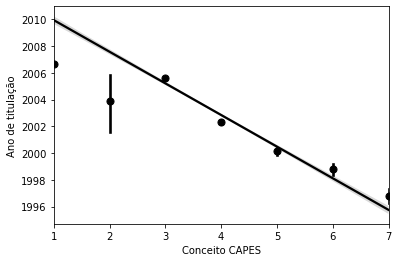

In [4]:
ano=df.groupby('CD_PROGRAMA_IES').mean()['AN_TITULACAO']
conceito=df.groupby('CD_PROGRAMA_IES').mean()['CD_CONCEITO_PROGRAMA']
sns.regplot(conceito,ano,x_estimator=np.mean,color='black')
plt.xlabel('Conceito CAPES')
plt.ylabel('Ano de titulação')

In [5]:
#por grau de titulação

df.groupby('NM_GRAU_TITULACAO').mean()['CD_CONCEITO_PROGRAMA'].round(2)

NM_GRAU_TITULACAO
BACHARELADO              4.33
DOUTORADO                4.24
MESTRADO                 3.95
MESTRADO PROFISSIONAL    3.48
Name: CD_CONCEITO_PROGRAMA, dtype: float64

In [6]:
#vendo o tamanho

df.groupby('NM_GRAU_TITULACAO').size()

NM_GRAU_TITULACAO
BACHARELADO                 67
DOUTORADO                94334
MESTRADO                   785
MESTRADO PROFISSIONAL       60
dtype: int64

In [7]:
#por sexo

df.groupby('TP_SEXO_DOCENTE').mean()['CD_CONCEITO_PROGRAMA'].round(2)

TP_SEXO_DOCENTE
FEMININO     4.19
MASCULINO    4.26
Name: CD_CONCEITO_PROGRAMA, dtype: float64

In [8]:
#vendo o tamanho

df.groupby('TP_SEXO_DOCENTE').size()

TP_SEXO_DOCENTE
FEMININO     39811
MASCULINO    55435
dtype: int64

In [9]:
#brasileiro ou estrangeiro

df.groupby('DS_TIPO_NACIONALIDADE_DOCENTE').mean()['CD_CONCEITO_PROGRAMA'].round(2)

DS_TIPO_NACIONALIDADE_DOCENTE
BRASILEIRO     4.23
ESTRANGEIRO    4.59
Name: CD_CONCEITO_PROGRAMA, dtype: float64

In [10]:
#por nacionalidade do docente

df.groupby('NM_PAIS_NACIONALIDADE_DOCENTE').mean()['CD_CONCEITO_PROGRAMA'].round(2).sort_values(ascending=False).head(15)

NM_PAIS_NACIONALIDADE_DOCENTE
PAQUISTÃO           7.00
NEPAL               7.00
SUDÃO               7.00
MACEDONIA           7.00
COREIA DO NORTE     6.00
SAARA OCIDENTAL     6.00
ESLOVÊNIA           6.00
IRÃ                 5.62
ARMÉNIA             5.50
CONGO               5.50
BULGÁRIA            5.31
AUSTRÁLIA           5.17
DINAMARCA           5.14
REPÚBLICA TCHECA    5.14
UCRÂNIA             5.10
Name: CD_CONCEITO_PROGRAMA, dtype: float64

In [11]:
#quais países tem mais docentes

df.groupby('NM_PAIS_NACIONALIDADE_DOCENTE').size().round(2).sort_values(ascending=False).head(15)

NM_PAIS_NACIONALIDADE_DOCENTE
BRASIL            92579
ARGENTINA           253
PORTUGAL            217
ESTADOS UNIDOS      216
ITÁLIA              198
PERU                196
FRANÇA              179
ALEMANHA            158
ESPANHA             147
CHILE               105
CUBA                 94
COLÔMBIA             93
URUGUAI              77
REINO UNIDO          76
RÚSSIA               56
dtype: int64

In [12]:
#por país da titulação

df.groupby('NM_PAIS_IES_TITULACAO').mean()['CD_CONCEITO_PROGRAMA'].round(2).sort_values(ascending=False).head(15)

NM_PAIS_IES_TITULACAO
PORTO RICO          7.00
GEÓRGIA             7.00
ESLOVÊNIA           7.00
REPÚBLICA TCHECA    5.50
ISRAEL              5.36
HUNGRIA             5.33
BULGÁRIA            5.22
CAMARÕES            5.00
DINAMARCA           4.87
ESTADOS UNIDOS      4.86
NOVA ZELÂNDIA       4.80
ARGENTINA           4.76
SUÍÇA               4.71
SUÉCIA              4.70
REINO UNIDO         4.70
Name: CD_CONCEITO_PROGRAMA, dtype: float64

In [13]:
#por grande área do conhecimento

df.groupby('NM_GRANDE_AREA_CONHECIMENTO').mean()['CD_CONCEITO_PROGRAMA'].round(2).sort_values(ascending=False).head(15)

NM_GRANDE_AREA_CONHECIMENTO
CIÊNCIAS EXATAS E DA TERRA     4.74
CIÊNCIAS BIOLÓGICAS            4.69
CIÊNCIAS DA SAÚDE              4.32
ENGENHARIAS                    4.28
CIÊNCIAS AGRÁRIAS              4.25
CIÊNCIAS HUMANAS               4.21
LINGÜÍSTICA, LETRAS E ARTES    4.20
CIÊNCIAS SOCIAIS APLICADAS     3.99
MULTIDISCIPLINAR               3.70
Name: CD_CONCEITO_PROGRAMA, dtype: float64

In [14]:
#por área do conhecimento

df.groupby('NM_AREA_CONHECIMENTO').mean()['CD_CONCEITO_PROGRAMA'].round(2).sort_values(ascending=False).head(15)
#chemistry rocks

NM_AREA_CONHECIMENTO
POLÍMEROS, APLICAÇÕES               7.00
SENSORIAMENTO REMOTO                7.00
NEFROLOGIA                          6.51
OUTRAS SOCIOLOGIAS ESPECÍFICAS      6.13
ALERGOLOGIA E IMUNOLOGIA CLÍNICA    6.00
ANATOMIA PATOLÓGICA ANIMAL          6.00
EDUCAÇÃO ESPECIAL                   6.00
PROCESSOS BIOQUÍMICOS               6.00
PSIQUIATRIA                         5.96
FITOPATOLOGIA                       5.92
MEDICINA PREVENTIVA                 5.90
BIOQUÍMICA                          5.84
PSICOLOGIA EXPERIMENTAL             5.76
QUÍMICA ORGÂNICA                    5.69
MATERIAIS ODONTOLÓGICOS             5.53
Name: CD_CONCEITO_PROGRAMA, dtype: float64

Text(0.5, 1.0, 'Conceito dos programas agrupados por área do conhecimento')

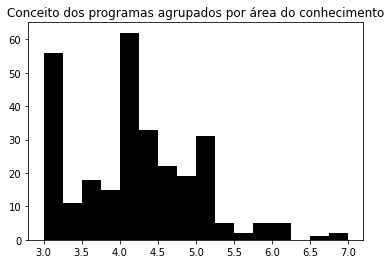

In [15]:
conceitos=df.groupby('NM_AREA_CONHECIMENTO').mean()['CD_CONCEITO_PROGRAMA']
conceitos.hist(bins=int(len(conceitos)**0.5),color='black',grid=False)
plt.title('Conceito dos programas agrupados por área do conhecimento')

#there's nothing to see here

/home/gustavo/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Média de docentes')

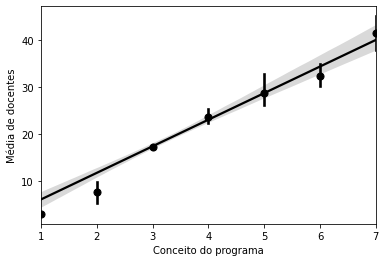

In [16]:
#relação entre número de docentes e conceito capes

conceito=df.groupby('CD_PROGRAMA_IES').mean()['CD_CONCEITO_PROGRAMA']
contagem=df.groupby('CD_PROGRAMA_IES').size()

sns.regplot(conceito,contagem,x_estimator=np.mean,color='black') #x_estimator=np.mean junta os dados discretos do conceito
plt.xlabel('Conceito do programa')
plt.ylabel('Média de docentes')

### Métricas mais relevantes até agora

    1. Número de docentes
    2. Ano de titulação do docente
    3. Área de estudo